In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

# A bit of history...

The linear regression is a very simple model that has been around for a long time. It was first published by Legendre in 1805, and Gauss published a version of it in 1809. The method was later named after Gauss and is now called the Gauss-Markov theorem. The method is still widely used today, and it is the basis for many other models.

# How does it work? 

what we will see : 
- see which problem can be solved by linear regression
- how to implement simple linear regression
- how to implement polynomial regression
- how to implement penalized regression

### Example

Linear regression is useful to model the relationship between a dependent variable and one or more independent variables. In this case, we have only one independent variable. 

Before using linear regression, we need to check if the relationship between the dependent variable and the independent variable is linear. We can do this by plotting the data.

Data Generating Process (DGP) : 

$$Y = 10 + 2X + \epsilon$$

where $\epsilon \sim \mathcal{N}(0, 1)$

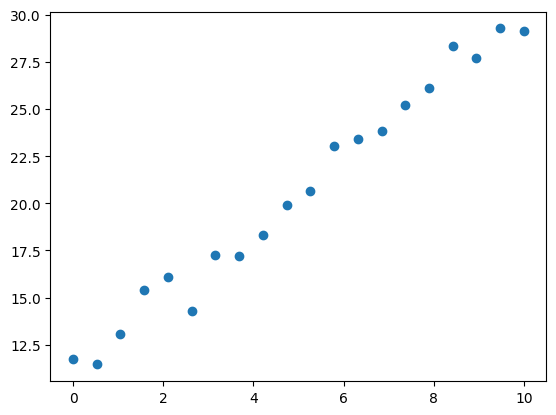

In [90]:
np.random.seed(0)
X = np.linspace(0, 10, 20)
Y = 10 + 2*X + np.random.normal(0, 1, 20)

plt.scatter(X, Y)
plt.show()

# Simple Linear Regression

When we have only one independent variable, the model is called simple linear regression. The model is defined as:

$$Y = \beta_0 + \beta_1X + \epsilon$$

where:
- $\beta_0$ is the intercept
- $\beta_1$ is the slope

The goal is to find the best values for $\beta_0$ and $\beta_1$ that minimize the sum of the squared errors. The sum of the squared errors is defined as:

$$SSE = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

$\beta_0$ and $\beta_1$ are estimated by OLS (Ordinary Least Squares) as follows:

$$\hat{\beta_1} = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2}$$
and 
$$\hat{\beta_0} = \bar{Y} - \hat{\beta_1}\bar{X}$$

The predicted value for a new imput $X$ is given by:

$$\hat{Y} = \hat{\beta_0} + \hat{\beta_1}X$$

In [91]:
def simple_linear_regression(X, Y):
    n = len(X)
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    XY_mean = np.mean(X*Y)
    X2_mean = np.mean(X**2)

    beta1 = (XY_mean - X_mean*Y_mean)/(X2_mean - X_mean**2)
    beta0 = Y_mean - beta1*X_mean

    return beta0, beta1

## Plot the data and the regression line

11.137947520534135 1.8862774144823005


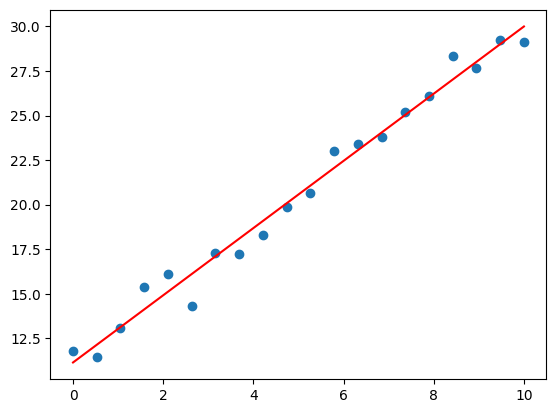

In [92]:
beta0, beta1 = simple_linear_regression(X, Y)
print(beta0, beta1)
plt.scatter(X, Y)
plt.plot(X, beta0 + beta1*X, 'r')
plt.show()

### comparison with sklearn library

In [93]:
X = X.reshape(-1, 1)
model = lm.LinearRegression()
model.fit(X, Y)
print(model.intercept_, model.coef_)

11.137947520534135 [1.88627741]


Of course, both methods give the same results.

# Polynomial Regression

Let's imagine that the relationship between the dependent variable and the independent variable is not linear. In this case, polynomial regression could be appropriate. The model is defined as:
$$Y = \beta_0 + \beta_1X + \beta_2X^2 + \ldots + \beta_nX^n + \epsilon$$




First of all we need to see visually if polynomial regression is appropriate.

Data Generating Process (DGP) : 

$$Y = 10 + 5X + 12X^2 - X^3 + \epsilon$$

where $\epsilon \sim \mathcal{N}(0, 1)$

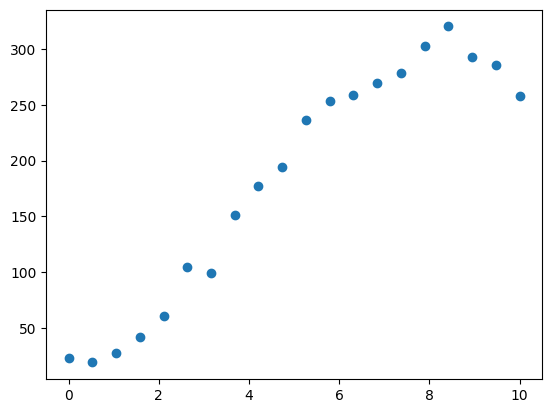

In [27]:
# generate some data with a polynomial relationship

Y = 10 + 5*X + 12*X**2 - X**3 + np.random.normal(0, 10, 20)

plt.scatter(X, Y)
plt.show()

the vector of coefficients is estimated by OLS as follows:

$$\hat{\beta} = (X^TX)^{-1}X^TY$$

In [83]:
def polynomial_regression(X, Y, degree):
    # from scratch
    
    n = len(X)
    X = np.array(X)
    Y = np.array(Y)
    X_power = np.array([X**i for i in range(degree+1)]).T
    
    beta = np.linalg.inv(X_power.T @ X_power) @ X_power.T @ Y
    
    return beta

## Plot the data and the polynomial regression curve

[-1.76235731 17.22201944  9.34848716 -0.84070623]


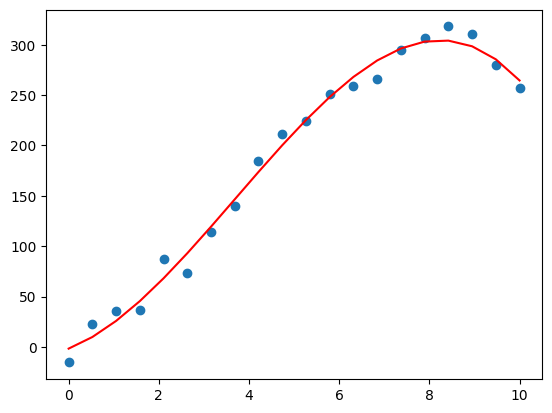

In [84]:
beta = polynomial_regression(X, Y, 3)
print(beta)

plt.scatter(X, Y)
plt.plot(X, beta.T @ np.array([X**i for i in range(4)]), 'r')
plt.show()

# Penalized Regression (ridge and lasso)

The penalized regression is used to prevent overfitting by adding a penalty term to the loss function. The two most common penalized regression methods are ridge regression and lasso regression.

Let's define the minimization problem for ridge and lasso regression: 

multiple regression (without penalization):

$$\min_{\beta} \left\{ \sum_{i=1}^{n} (Y_i - \beta_0 - \sum_{j=1}^{p} \beta_jX_{ij})^2 \right\}$$

Ridge regression:
$$\min_{\beta} \left\{ \sum_{i=1}^{n} (Y_i - \beta_0 - \sum_{j=1}^{p} \beta_jX_{ij})^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right\}$$

Lasso regression:
$$\min_{\beta} \left\{ \sum_{i=1}^{n} (Y_i - \beta_0 - \sum_{j=1}^{p} \beta_jX_{ij})^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right\}$$

where $\lambda$ is the penalty term.

## Ridge Regression (on polynomial data)

In [79]:
Y = 10 + 5*X + 12*X**2 - X**3 + np.random.normal(0, 10, 20)

the vector of coefficients is estimated by OLS as follows:

$$\hat{\beta} = (X^TX + \lambda I)^{-1}X^TY$$

In [85]:

def ridge_regression(X, Y, degree, _lambda):
    n = len(X)
    X = np.array(X)
    Y = np.array(Y)
    X_power = np.array([X**i for i in range(degree+1)]).T
    
    beta = np.linalg.inv(X_power.T @ X_power + _lambda*np.eye(degree+1)) @ X_power.T @ Y
    
    return beta

[-1.10064991 16.53879209  9.50054436 -0.84998592]


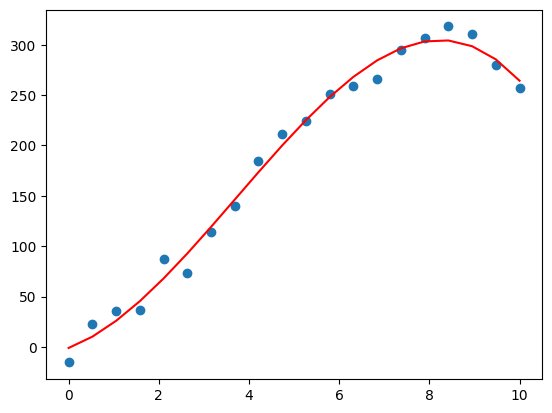

In [86]:
beta_ridge = ridge_regression(X, Y, 3, 0.1)
print(beta_ridge)

plt.scatter(X, Y)
plt.plot(X, beta_ridge.T @ np.array([X**i for i in range(4)]), 'r')
plt.show()

## Lasso Regression (on polynomial data)

[ 0.         19.87376347  8.69569499 -0.79837678]
-3.828041652100495


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.114e+03, tolerance: 2.334e+01
  model = cd_fast.enet_coordinate_descent(


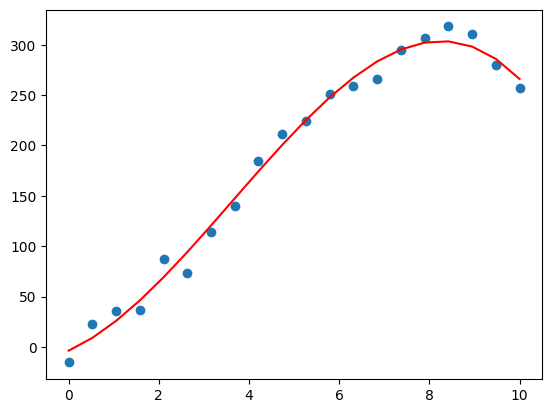

In [87]:
# using sklearn

X_train = np.array([np.array(X)**i for i in range(3+1)]).T
Y_train = np.array(Y)

lasso = lm.Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)
print(lasso.coef_)
print(lasso.intercept_)

plt.scatter(X, Y)
plt.plot(X, lasso.predict(X_), 'r')